<a href="https://colab.research.google.com/github/karolinefarias/data-science-basico/blob/main/Introdu%C3%A7%C3%A3o_ao_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao pandas: Transformando Dados com Facilidade e Eficiência

SUMÁRIO

1. O que é pandas?
2. Importando pandas
3. Entendendo Tipos de Dados no pandas
4. Importando Dados
5. Exportando Dados
6. Descrevendo Dados
7. Visualizando e Selecionando Dados
8. Manipulando Dados


Datasets de apoio:

* cars_sale: https://drive.google.com/file/d/10oyES16a4l5IBv4h52_oGBTto8lpvROI/view?usp=sharing
* car-sales-missing-data: https://drive.google.com/file/d/1WMabappBG6X12KGc3PMd2eRXHSzBk8b0/view?usp=sharing


## 1. O que é pandas?

[pandas](https://pandas.pydata.org/) é uma biblioteca open-source que ajuda a analisar e manipular dados.
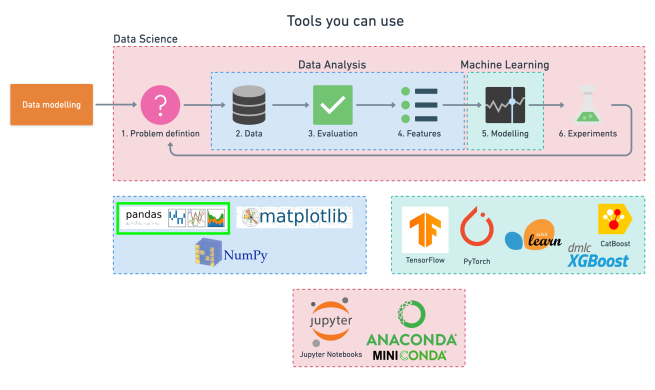

Fonte: https://zerotomastery.io

De acordo com uma pesquisa feita pela [Jetbrains em 2021 e 2022](https://blog.jetbrains.com/pycharm/2023/10/future-of-data-science/), aproximadamente **55% dos analista de dados usa pandas/python**.

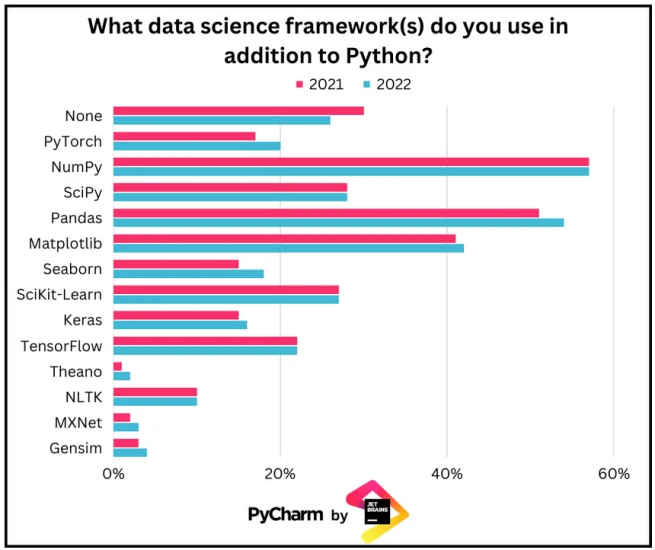

Fonte: https://zerotomastery.io

## 2. Importando pandas

**Input:**

In [1]:
import pandas as pd

#Printa a versão do pandas
print(f"Versão do pandas: {pd.__version__}")

Versão do pandas: 2.0.3


## 3. Entendendo tipos de dados no pandas

O pandas possui dois principais tipos de dados, **Series** e **DataFrame**:

* **pandas.Series** é uma coluna unidimensional de dados, enquanto
* **pandas.DataFrame** (mais comum) é uma tabela bidimensional de dados com linhas e colunas

Você pode criar uma Series utilizando pd.Series() e passando para ela uma lista em Python.

Exemplo:

In [2]:
carros = pd.Series(['BMW', 'TOYOTA', 'HONDA'])

In [3]:
carros

0       BMW
1    TOYOTA
2     HONDA
dtype: object

In [4]:
cores = pd.Series(['Azul', 'Vermelho', 'Branco'])

In [5]:
cores

0        Azul
1    Vermelho
2      Branco
dtype: object

Você pode criar um **Dataframe** usando pd.DataFrame e passando um dicionário. Utilizando as duas séries criadas anteriormente:

In [6]:
# Criando DataFrame de carros e cores

In [7]:
car_data = pd.DataFrame({'Marca': carros,
                         'Cor': cores})

In [8]:
car_data

,Marca,Cor
0,BMW,Azul
1,TOYOTA,Vermelho
2,HONDA,Branco


## 4. Importando dados

Poder criar **Series** e **DataFrames** do zero é bom, mas geralmente você estará importando seus dados na forma de um **arquivo .csv** (arquivo de valores separados por vírgula), um arquivo de planilha ou algo semelhante, como um **banco de dados SQL**.

A boa notícia é que o pandas permite a importação fácil de dados assim através de funções como **pd.read_csv()** e **pd.read_excel()** para arquivos do Microsoft Excel.

Por exemplo...

In [9]:
cars_sale = pd.read_csv('cars-sale.csv')

In [10]:
cars_sale

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"
4,Nissan,White,213095,4,"$3,500"
5,Toyota,Green,99213,4,"$4,500"
6,Honda,Blue,45698,4,"$7,500"
7,Toyota,White,54738,4,"$7,000"
8,Honda,Blue,60000,4,"$6,250"
9,Nissan,White,31600,4,"$9,700"


In [11]:
df = pd.read_csv('cars-sale.csv')

In [12]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"
4,Nissan,White,213095,4,"$3,500"
5,Toyota,Green,99213,4,"$4,500"
6,Honda,Blue,45698,4,"$7,500"
7,Toyota,White,54738,4,"$7,000"
8,Honda,Blue,60000,4,"$6,250"
9,Nissan,White,31600,4,"$9,700"


## 5. Exportando dados

O pandas permite que você exporte **DataFrames** para o formato **.csv** usando **.to_csv()**, ou para um formato de planilha usando .**to_excel()**.

Por exemplo...

In [13]:
#Exportar DataFrame para csv
cars_sale.to_csv("exported-car-sales.csv")

## 6. Descrevendo dados

Uma das primeiras coisas que você vai querer fazer depois de importar os dados, é explorá-lo.

O pandas oferece várias funções prontas que permitem explorar e manipular os dados rapidamente.

### **.dtypes**: mostra cada tipo das colunas do dataframe

In [14]:
cars_sale.dtypes

Make        object
Colour      object
Odometer     int64
Doors        int64
Price       object
dtype: object

Note que **Price** não é inteiro como **Odometer** e **Doors**. Vamos consertar isso mais tarde.

### **.describe()**: mostra algumas estatísticas básicas sobre os dados

In [15]:
cars_sale.describe()

,Odometer,Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


### **.info()**: apresenta algumas informações úteis sobre o dataframe:


*   Quantas linhas há no dataframe
*   Se há valores ausentes (nulos)
*   Os tipos de dados de cada coluna



In [16]:
cars_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Make      10 non-null     object
 1   Colour    10 non-null     object
 2   Odometer  10 non-null     int64 
 3   Doors     10 non-null     int64 
 4   Price     10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


### Usando os operadores matemáticos: **.mean()**, **.sum()** em um dataframe e em series

In [17]:
cars_sale.mean(numeric_only=True)

Odometer    78601.4
Doors           4.0
dtype: float64

In [18]:
cars_price = pd.Series([3000, 3500, 11250])

cars_price.mean()

5916.666666666667

In [19]:
cars_sale.sum(numeric_only=False)

Make        ToyotaHondaToyotaBMWNissanToyotaHondaToyotaHon...
Colour          WhiteRedBlueBlackWhiteGreenBlueWhiteBlueWhite
Odometer                                               786014
Doors                                                      40
Price       $4,000$5,000$7,000$22,000$3,500$4,500$7,500$7,...
dtype: object

In [20]:
cars_sale.sum(numeric_only=True)

Odometer    786014
Doors           40
dtype: int64

In [21]:
cars_price.sum()

17750

### Usando **.columns** para mostrar as colunas em um dataframe

In [22]:
cars_sale.columns

Index(['Make', 'Colour', 'Odometer', 'Doors', 'Price'], dtype='object')

In [23]:
cars_columns = cars_sale.columns
cars_columns[0]

'Make'

### Usando **.index** para acessar valores no dataframe

In [24]:
cars_sale.index

RangeIndex(start=0, stop=10, step=1)

In [25]:
len(cars_sale)

10

### 7. Visualizando e selecionando dados

* **DataFrame.head(n=5)** - Mostra as primeiras n linhas de um dataframe.

* **DataFrame.tail(n=5)** - Mostra as n últimas linhas de um dataframe.

* **DataFrame.loc[]** - Acessa um grupo de linhas e colunas por labels ou um array booleano.

* **DataFrame.iloc[]** - Acessa um grupo de linhas e colunas pelo índice numérico. (e.g. car_sales.iloc[0] mostra todas as colunas com index 0.

* **DataFrame.columns** - mostra os nomes das colunas em forma de lista.

* **DataFrame['A']** - Seleciona a coluna com nome A no DataFrame.

* **DataFrame[DataFrame['A'] > 5]** - Filtro baseado na coluna que atende a uma condição. (e.g. todas as linhas onde a ccoluna 'A' é maior que 5

* **DataFrame.plot()** - Cria um gráfico de linha a partir de colunas de um DataFrame(e.g. plot as colunas Make vs. Odometer (KM)  com car_sales[["Make", "Odometer (KM)"]].plot();)

* **DataFrame.hist()** - gera um historgrama das colunas do DataFrame

* **pandas.crosstab()** - Cria uma tabela cruzada de duas ou mais variáveis.

In [26]:
# Show the first 5 rows of car_sales
cars_sale.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"
4,Nissan,White,213095,4,"$3,500"


In [27]:
# Show the first 7 rows of car_sales
cars_sale.head(7)

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"
4,Nissan,White,213095,4,"$3,500"
5,Toyota,Green,99213,4,"$4,500"
6,Honda,Blue,45698,4,"$7,500"


In [28]:
# Show bottom 5 rows of car_sales
cars_sale.tail()

,Make,Colour,Odometer,Doors,Price
5,Toyota,Green,99213,4,"$4,500"
6,Honda,Blue,45698,4,"$7,500"
7,Toyota,White,54738,4,"$7,000"
8,Honda,Blue,60000,4,"$6,250"
9,Nissan,White,31600,4,"$9,700"


In [29]:
# Create a sample series
animals = pd.Series(["cat", "dog", "bird", "snake", "ox", "lion"],
                    index=[0, 3, 9, 8, 67, 3])
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

In [30]:
# Select all indexes with 3
animals.loc[3]

3     dog
3    lion
dtype: object

In [31]:
# Select index 9
animals.loc[9]

'bird'

In [33]:
# Select row at index 3
cars_sale.loc[3]

Make            BMW
Colour        Black
Odometer      11179
Doors             5
Price       $22,000
Name: 3, dtype: object

In [34]:
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

In [35]:
# Select row at position 3
animals.iloc[3]

'snake'

In [37]:
# Select row at position 3
cars_sale.iloc[3]

Make            BMW
Colour        Black
Odometer      11179
Doors             5
Price       $22,000
Name: 3, dtype: object

In [38]:
# Get all rows up to position 3
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [40]:
# Get all rows up to (and including) index 3
cars_sale.loc[:3]

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"


In [42]:
# Get all rows of the "Colour" column
cars_sale.loc[:, "Colour"] # note: ":" stands for "all", e.g. "all indices in the first axis"

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7    White
8     Blue
9    White
Name: Colour, dtype: object

Use **.loc[]** quando estiver selecionando linhas e colunas com base em seus rótulos ou em uma condição (por exemplo, recuperando dados de colunas específicas).
Use **.iloc[]** quando estiver selecionando linhas e colunas com base nas posições de índice inteiro (por exemplo, extrair as dez primeiras linhas independentemente dos rótulos).

In [41]:
# Select Make column
cars_sale['Make']

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7    Toyota
8     Honda
9    Nissan
Name: Make, dtype: object

In [43]:
# Select Colour column
cars_sale['Colour']

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7    White
8     Blue
9    White
Name: Colour, dtype: object

In [45]:
# Select cars with over 100,000 on the Odometer
cars_sale[cars_sale["Odometer"] > 100000]

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
4,Nissan,White,213095,4,"$3,500"


In [46]:
# Select cars which are made by Toyota
cars_sale[cars_sale["Make"] == "Toyota"]

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,"$4,000"
2,Toyota,Blue,32549,3,"$7,000"
5,Toyota,Green,99213,4,"$4,500"
7,Toyota,White,54738,4,"$7,000"


In [47]:
# Compare car Make with number of Doors
pd.crosstab(cars_sale["Make"], cars_sale["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


Use o **.groupby()** para comparar contextualmente colunas.

In [48]:
# Group by the Make column and find the mean of the other columns
cars_sale.groupby(["Make"]).mean(numeric_only=True)

,Odometer,Doors
Make,,
BMW,11179.000000,5.00
Honda,64532.333333,4.00
Nissan,122347.500000,4.00
Toyota,84135.750000,3.75


Use o **matplotlib** para visualizar dados em colunas. O pandas até permite a plotagem rápida de colunas para que você possa visualizar seus dados, desde que importe o matplotlib.

Importante: Se seus gráficos não estiverem aparecendo, tente executar as duas linhas de código abaixo:

```%matplotlib inline``` é um comando especial que diz ao Jupyter para mostrar seus gráficos.
Comandos com % na frente são chamados de comandos mágicos.

In [49]:
# Import matplotlib and tell Jupyter to show plots
import matplotlib.pyplot as plt
%matplotlib inline

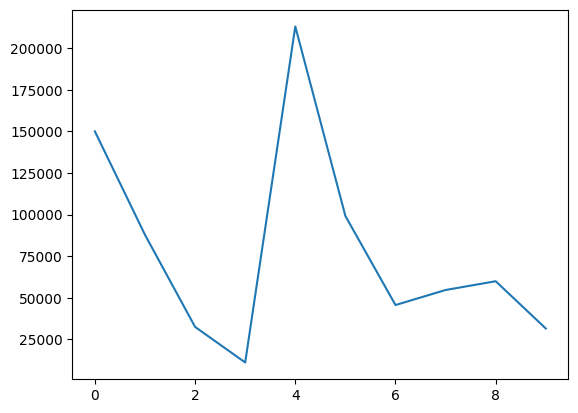

In [50]:
cars_sale["Odometer"].plot(); # tip: the ";" on the end prevents matplotlib from outputting the plot class

Compare colunas com x, y e ```plot()```
Você pode comparar duas colunas passando-as como x e y para ```plot()```.

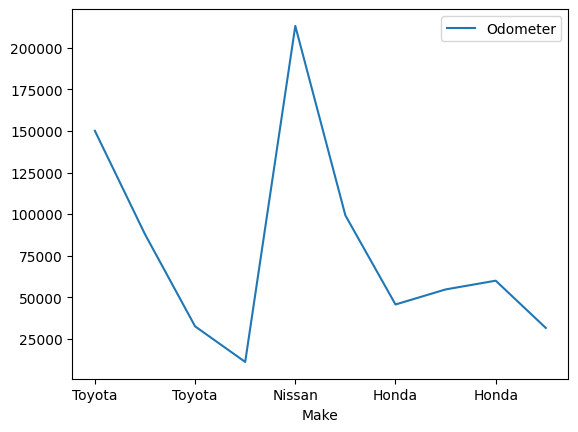

In [51]:
cars_sale.plot(x="Make", y="Odometer");


Use ```.hist()``` para ver a distribuição

A distribuição de algo é uma forma de descrever a dispersão de diferentes valores. Você pode ver a distribuição de uma coluna chamando ```.hist()``` nela

<Axes: >

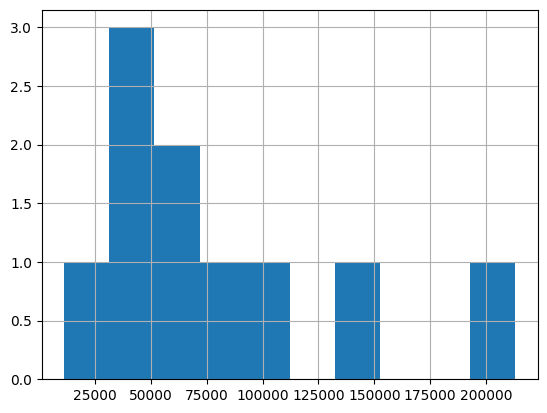

In [52]:
cars_sale["Odometer"].hist()


Neste caso, a maioria da distribuição (espalhamento) da coluna Odometer (KM) está mais para a esquerda do gráfico, e há dois valores atípicos adicionais à direita.

Agora, e se quisermos plotar nossa coluna Price?

In [53]:
cars_sale["Price"].plot()


TypeError: no numeric data to plot

In [54]:
cars_sale.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Make      10 non-null     object
 1   Colour    10 non-null     object
 2   Odometer  10 non-null     int64 
 3   Doors     10 non-null     int64 
 4   Price     10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [61]:
cars_sale['Price'].str.replace('[\$\,\.]', '', regex=True)

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: object

In [62]:
cars_sale['Price'] = cars_sale['Price'].str.replace('[\$\,\.]', '', regex=True).astype(int)

In [63]:
cars_sale

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Toyota,White,54738,4,7000
8,Honda,Blue,60000,4,6250
9,Nissan,White,31600,4,9700


In [65]:
cars_sale.dtypes

Make        object
Colour      object
Odometer     int64
Doors        int64
Price        int64
dtype: object

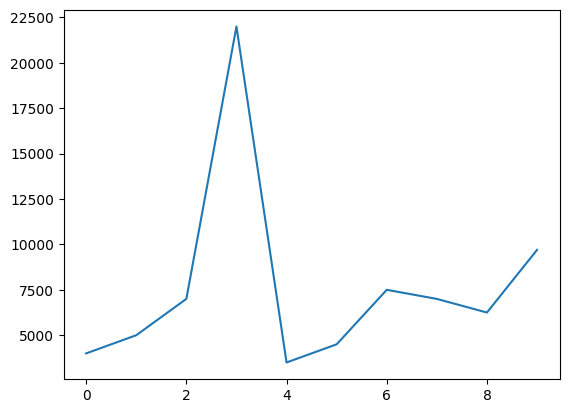

In [66]:
cars_sale["Price"].plot();


## 8. Manipulando dados



Manipulando dados no pandas com métodos de string

In [67]:
cars_sale["Make"].str.lower()


0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7    toyota
8     honda
9    nissan
Name: Make, dtype: object

In [68]:
# View top 5 rows, Make column not lowered
cars_sale.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [69]:
# Set Make column to be lowered
cars_sale["Make"] = cars_sale["Make"].str.lower()
cars_sale.head()

,Make,Colour,Odometer,Doors,Price
0,toyota,White,150043,4,4000
1,honda,Red,87899,4,5000
2,toyota,Blue,32549,3,7000
3,bmw,Black,11179,5,22000
4,nissan,White,213095,4,3500


Use ```.fillna()``` para preencher dados faltantes.

In [70]:
# Import car sales data with missing values
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
Toyota,White,150043.0,4.0,$4,0.0
Honda,Red,87899.0,4.0,$5,0.0
Toyota,Blue,NaN,3.0,$7,0.0
BMW,Black,11179.0,5.0,$22,0.0
Nissan,White,213095.0,4.0,$3,500.0
Toyota,Green,NaN,4.0,$4,500.0
Honda,NaN,NaN,4.0,$7,500.0
Honda,Blue,NaN,4.0,NaN,NaN
Toyota,White,60000.0,NaN,NaN,NaN
NaN,White,31600.0,4.0,$9,700.0


In [71]:
# Fill Odometer column missing values with mean
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),
                                     inplace=False) # inplace is set to False by default

Toyota    4.0
Honda     4.0
Toyota    3.0
BMW       5.0
Nissan    4.0
Toyota    4.0
Honda     4.0
Honda     4.0
Toyota    4.0
NaN       4.0
Name: Odometer, dtype: float64

In [72]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
Toyota,White,150043.0,4.0,$4,0.0
Honda,Red,87899.0,4.0,$5,0.0
Toyota,Blue,NaN,3.0,$7,0.0
BMW,Black,11179.0,5.0,$22,0.0
Nissan,White,213095.0,4.0,$3,500.0
Toyota,Green,NaN,4.0,$4,500.0
Honda,NaN,NaN,4.0,$7,500.0
Honda,Blue,NaN,4.0,NaN,NaN
Toyota,White,60000.0,NaN,NaN,NaN
NaN,White,31600.0,4.0,$9,700.0


In [73]:
# Fill the Odometer missing values to the mean with inplace=True
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),
                                     inplace=True)


In [74]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
Toyota,White,150043.0,4.0,$4,0.0
Honda,Red,87899.0,4.0,$5,0.0
Toyota,Blue,NaN,3.0,$7,0.0
BMW,Black,11179.0,5.0,$22,0.0
Nissan,White,213095.0,4.0,$3,500.0
Toyota,Green,NaN,4.0,$4,500.0
Honda,NaN,NaN,4.0,$7,500.0
Honda,Blue,NaN,4.0,NaN,NaN
Toyota,White,60000.0,4.0,NaN,NaN
NaN,White,31600.0,4.0,$9,700.0


Use ```.dropna()``` se você deseja remover linhas com dados faltantes.

In [75]:
car_sales_missing.dropna()


,Make,Colour,Odometer,Doors,Price
Toyota,White,150043.0,4.0,$4,0.0
Honda,Red,87899.0,4.0,$5,0.0
BMW,Black,11179.0,5.0,$22,0.0
Nissan,White,213095.0,4.0,$3,500.0
NaN,White,31600.0,4.0,$9,700.0


In [76]:
# The following two lines do the same thing
car_sales_missing.dropna(inplace=True) # Operation happens inplace without reassignment
car_sales_missing = car_sales_missing.dropna() # car_sales_missing gets reassigned to same DataFrame but with dropped values

In [77]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
Toyota,White,150043.0,4.0,$4,0.0
Honda,Red,87899.0,4.0,$5,0.0
BMW,Black,11179.0,5.0,$22,0.0
Nissan,White,213095.0,4.0,$3,500.0
NaN,White,31600.0,4.0,$9,700.0


Em vez de remover ou preencher dados, e se você quiser criá-los?

O pandas permite a criação simples de colunas adicionais em DataFrames.

Três maneiras comuns são:

Adicionar um ```pandas.Series``` como uma coluna adicional
Adicionar uma lista Python como uma coluna, ou
Usar colunas existentes para criar uma nova coluna

In [78]:
# Create a column from a pandas Series
seats_column = pd.Series([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
cars_sale["Seats"] = seats_column
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats
0,toyota,White,150043,4,4000,5
1,honda,Red,87899,4,5000,5
2,toyota,Blue,32549,3,7000,5
3,bmw,Black,11179,5,22000,5
4,nissan,White,213095,4,3500,5
5,toyota,Green,99213,4,4500,5
6,honda,Blue,45698,4,7500,5
7,toyota,White,54738,4,7000,5
8,honda,Blue,60000,4,6250,5
9,nissan,White,31600,4,9700,5


In [79]:
# Create a column from a Python list
engine_sizes = [1.3, 2.0, 3.0, 4.2, 1.6, 1, 2.0, 2.3, 2.0, 3.0]
cars_sale["Engine Size"] = engine_sizes
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size
0,toyota,White,150043,4,4000,5,1.3
1,honda,Red,87899,4,5000,5,2.0
2,toyota,Blue,32549,3,7000,5,3.0
3,bmw,Black,11179,5,22000,5,4.2
4,nissan,White,213095,4,3500,5,1.6
5,toyota,Green,99213,4,4500,5,1.0
6,honda,Blue,45698,4,7500,5,2.0
7,toyota,White,54738,4,7000,5,2.3
8,honda,Blue,60000,4,6250,5,2.0
9,nissan,White,31600,4,9700,5,3.0


In [81]:
# Column from other columns
cars_sale["Price per KM"] = cars_sale["Price"] / cars_sale["Odometer"]
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Price per KM
0,toyota,White,150043,4,4000,5,1.3,0.026659
1,honda,Red,87899,4,5000,5,2.0,0.056883
2,toyota,Blue,32549,3,7000,5,3.0,0.215060
3,bmw,Black,11179,5,22000,5,4.2,1.967976
4,nissan,White,213095,4,3500,5,1.6,0.016425
5,toyota,Green,99213,4,4500,5,1.0,0.045357
6,honda,Blue,45698,4,7500,5,2.0,0.164121
7,toyota,White,54738,4,7000,5,2.3,0.127882
8,honda,Blue,60000,4,6250,5,2.0,0.104167
9,nissan,White,31600,4,9700,5,3.0,0.306962


Ao comprar um carro, geralmente menos quilômetros no odômetro é melhor.

Esse tipo de criação de coluna é chamado de **engenharia de características**, a prática de enriquecer seu conjunto de dados com mais informações (seja diretamente dele ou de outro lugar).

Se Marca, Cor e Portas são características dos dados, criar Preço por KM poderia ser outro. Mas neste caso, não seria uma boa escolha.

Quanto à criação de colunas, você também pode criar uma nova coluna definindo todos os valores para um valor padrão.

In [82]:
# Column to all 1 value (number of wheels)
cars_sale["Number of wheels"] = 4
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Price per KM,Number of wheels
0,toyota,White,150043,4,4000,5,1.3,0.026659,4
1,honda,Red,87899,4,5000,5,2.0,0.056883,4
2,toyota,Blue,32549,3,7000,5,3.0,0.215060,4
3,bmw,Black,11179,5,22000,5,4.2,1.967976,4
4,nissan,White,213095,4,3500,5,1.6,0.016425,4
5,toyota,Green,99213,4,4500,5,1.0,0.045357,4
6,honda,Blue,45698,4,7500,5,2.0,0.164121,4
7,toyota,White,54738,4,7000,5,2.3,0.127882,4
8,honda,Blue,60000,4,6250,5,2.0,0.104167,4
9,nissan,White,31600,4,9700,5,3.0,0.306962,4


In [83]:
cars_sale["Passed road safety"] = True
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Price per KM,Number of wheels,Passed road safety
0,toyota,White,150043,4,4000,5,1.3,0.026659,4,True
1,honda,Red,87899,4,5000,5,2.0,0.056883,4,True
2,toyota,Blue,32549,3,7000,5,3.0,0.215060,4,True
3,bmw,Black,11179,5,22000,5,4.2,1.967976,4,True
4,nissan,White,213095,4,3500,5,1.6,0.016425,4,True
5,toyota,Green,99213,4,4500,5,1.0,0.045357,4,True
6,honda,Blue,45698,4,7500,5,2.0,0.164121,4,True
7,toyota,White,54738,4,7000,5,2.3,0.127882,4,True
8,honda,Blue,60000,4,6250,5,2.0,0.104167,4,True
9,nissan,White,31600,4,9700,5,3.0,0.306962,4,True


Removendo colunas

In [84]:
# Drop the Price per KM column
cars_sale = cars_sale.drop("Price per KM", axis=1) # columns live on axis 1
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Number of wheels,Passed road safety
0,toyota,White,150043,4,4000,5,1.3,4,True
1,honda,Red,87899,4,5000,5,2.0,4,True
2,toyota,Blue,32549,3,7000,5,3.0,4,True
3,bmw,Black,11179,5,22000,5,4.2,4,True
4,nissan,White,213095,4,3500,5,1.6,4,True
5,toyota,Green,99213,4,4500,5,1.0,4,True
6,honda,Blue,45698,4,7500,5,2.0,4,True
7,toyota,White,54738,4,7000,5,2.3,4,True
8,honda,Blue,60000,4,6250,5,2.0,4,True
9,nissan,White,31600,4,9700,5,3.0,4,True


Por que ```axis=1``` ?
 Simplesmente porque é onde os eixos das colunas estão localizados, enquanto as linhas estão no ```axis=0```.

Para fazer isso, você pode usar ```.sample(frac=1)```
```.sample()``` amostra aleatoriamente diferentes linhas de um DataFrame.

O parâmetro frac indica a fração, onde 1 = 100% das linhas, 0.5 = 50% das linhas, 0.01 = 1% das linhas. Você também pode usar ```.sample(n=1)``` onde n é o número de linhas a serem amostradas.


In [85]:
# Sample car_sales
car_sales_sampled = cars_sale.sample(frac=1)
car_sales_sampled

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Number of wheels,Passed road safety
8,honda,Blue,60000,4,6250,5,2.0,4,True
4,nissan,White,213095,4,3500,5,1.6,4,True
9,nissan,White,31600,4,9700,5,3.0,4,True
2,toyota,Blue,32549,3,7000,5,3.0,4,True
5,toyota,Green,99213,4,4500,5,1.0,4,True
3,bmw,Black,11179,5,22000,5,4.2,4,True
1,honda,Red,87899,4,5000,5,2.0,4,True
7,toyota,White,54738,4,7000,5,2.3,4,True
6,honda,Blue,45698,4,7500,5,2.0,4,True
0,toyota,White,150043,4,4000,5,1.3,4,True


Se você tivesse 2.000.000 de linhas.

Realizar testes, análises e algoritmos de machine learning em 2.000.000 de linhas poderia levar muito tempo. E como ser um cientista de dados ou engenheiro de machine learning envolve reduzir o tempo entre os experimentos, você pode começar primeiro com uma amostra de linhas.

Você poderia usar ```40k_rows = 2_mil_rows.sample(frac=0.05)``` para trabalhar com 40.000 linhas de um DataFrame chamado 2_mil_rows contendo 2.000.000 de linhas.

Se você quiser colocar os índices de volta em ordem, você pode fazer isso usando ```.reset_index().```

In [86]:
# Reset the indexes of car_sales_sampled
car_sales_sampled.reset_index()

,index,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Number of wheels,Passed road safety
0,8,honda,Blue,60000,4,6250,5,2.0,4,True
1,4,nissan,White,213095,4,3500,5,1.6,4,True
2,9,nissan,White,31600,4,9700,5,3.0,4,True
3,2,toyota,Blue,32549,3,7000,5,3.0,4,True
4,5,toyota,Green,99213,4,4500,5,1.0,4,True
5,3,bmw,Black,11179,5,22000,5,4.2,4,True
6,1,honda,Red,87899,4,5000,5,2.0,4,True
7,7,toyota,White,54738,4,7000,5,2.3,4,True
8,6,honda,Blue,45698,4,7500,5,2.0,4,True
9,0,toyota,White,150043,4,4000,5,1.3,4,True


**Aplicando funções a uma coluna.**

Você pode fazer isso usando a função ```.apply()``` e passando uma função lambda em Python.

Sabemos que há aproximadamente 1,6 quilômetros em uma milha, então se você dividir o valor na coluna Odometer por 1,6, isso deve convertê-lo para milhas, como mostrado abaixo:



In [88]:
# Change the Odometer values from kilometres to miles
cars_sale["Odometer"].apply(lambda x: x / 1.6)

0     93776.875
1     54936.875
2     20343.125
3      6986.875
4    133184.375
5     62008.125
6     28561.250
7     34211.250
8     37500.000
9     19750.000
Name: Odometer, dtype: float64

In [89]:
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Number of wheels,Passed road safety
0,toyota,White,150043,4,4000,5,1.3,4,True
1,honda,Red,87899,4,5000,5,2.0,4,True
2,toyota,Blue,32549,3,7000,5,3.0,4,True
3,bmw,Black,11179,5,22000,5,4.2,4,True
4,nissan,White,213095,4,3500,5,1.6,4,True
5,toyota,Green,99213,4,4500,5,1.0,4,True
6,honda,Blue,45698,4,7500,5,2.0,4,True
7,toyota,White,54738,4,7000,5,2.3,4,True
8,honda,Blue,60000,4,6250,5,2.0,4,True
9,nissan,White,31600,4,9700,5,3.0,4,True


In [91]:
# Reassign the Odometer column to be miles instead of kilometers
cars_sale["Odometer"] = cars_sale["Odometer"].apply(lambda x: x / 1.6)
cars_sale

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Number of wheels,Passed road safety
0,toyota,White,93776.875,4,4000,5,1.3,4,True
1,honda,Red,54936.875,4,5000,5,2.0,4,True
2,toyota,Blue,20343.125,3,7000,5,3.0,4,True
3,bmw,Black,6986.875,5,22000,5,4.2,4,True
4,nissan,White,133184.375,4,3500,5,1.6,4,True
5,toyota,Green,62008.125,4,4500,5,1.0,4,True
6,honda,Blue,28561.250,4,7500,5,2.0,4,True
7,toyota,White,34211.250,4,7000,5,2.3,4,True
8,honda,Blue,37500.000,4,6250,5,2.0,4,True
9,nissan,White,19750.000,4,9700,5,3.0,4,True
